## Fraud Detection inotech

In [2]:
import pandas as pd 
import numpy as np
import math
from datetime import datetime
from tqdm import tqdm
import re
#Plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure
#Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
#MLP
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization, Dense, Dropout, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
#Feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
#Evaluation
from statistics import mean, stdev
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Anomaly Detection
from sklearn.ensemble import IsolationForest
#Time Series
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
#Ignore warning
import warnings
warnings.filterwarnings("ignore")

## Outline
- [Methods](#0)
- [Dataset](#1)
- [Features](#2)
- [Graph Based Features](#3)
- [Train the models](#4)


<a name="0"></a>
**Methods**

In [3]:
def featureAnalysis(feature,dataset):
    a = dataset.describe()
    b = a[feature].to_frame().T
    fig, ax = plt.subplots(2, 1, figsize=(20, 18))
    sns.histplot(x=dataset[feature], data=dataset, kde=True, element="step",ax=ax[0])
    sns.boxplot(data=dataset , x = feature ,ax=ax[1])
    return(b)

In [4]:
def confusionMat(Y_test, y_pred,y_prob,modelName):
    cf_matrix = confusion_matrix(Y_test, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    fpr, tpr, thresh = roc_curve(Y_test, y_prob, pos_label=1)
    auc = roc_auc_score(Y_test, y_prob)
    
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    print("\n",modelName,"...................................\n") 
    print("Accuracy:", accuracy)
    print("F1-Score:", f1)
    fig, ax = plt.subplots(1, 2, figsize=(20, 8))
    sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues',ax=ax[0])
    plt.plot(fpr,tpr,label="AUC="+str(auc))
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc=4)
    plt.show()
    print(classification_report(Y_test, y_pred,zero_division=1))
    return accuracy, f1

In [5]:
def KmeansMethod(dataset,minK,maxK): 
    inertia = []
    silhouette_scores = []
    silhouette_dict = {}  # Dictionary to store silhouette scores
    k_values = range(minK, maxK)  # Test values of k from 2 to 10

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(dataset)
        inertia.append(kmeans.inertia_)
        silhouette_score_k = silhouette_score(dataset, kmeans.labels_)
        silhouette_scores.append(silhouette_score_k)
        silhouette_dict[k] = silhouette_score_k
        
    sorted_scores = sorted(silhouette_dict.items(), key=lambda x: x[1], reverse=True)

    # Print all silhouette scores in sorted order
    print("Silhouette scores (sorted in descending order):")
    for k, score in sorted_scores:
        print(f"Silhouette score for k={k}: {score}")
        
    # Plotting inertia and silhouette score
    plt.figure(figsize=(20, 6))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertia, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Inertia vs. Number of Clusters')

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')

    plt.tight_layout()
    plt.show()

<a name="1"></a>
## Datasets

In [6]:
train = pd.read_csv("data/InnoTech-Data/Trainset-Evaluation/Train_Set.csv")
evaluation   = pd.read_csv("data/InnoTech-Data/Trainset-Evaluation/Evaluation_Set.csv")
transactions = pd.read_csv("data/InnoTech-Data/Transaction/InnoTech_Trans.csv")

**Train and evaluation**

In [7]:
train

,CARD,DATE,LABEL
0,009e24d27d670b24a73d,2023/05/09 00:00:00,1.0
1,009e24d27d670b24a73d,2023/05/03 00:00:00,1.0
2,009e24d27d670b24a73d,2023/04/26 00:00:00,1.0
3,034ae47f44e914cb7ee6,2023/05/30 00:00:00,1.0
4,0b2c8a4c5e9a0b1546ee,2023/03/16 00:00:00,1.0
...,...,...,...
28180,ad0b2864c4544f27c83d,2023/03/06 00:00:00,2.0
28181,64e272dfcf2db4b4d4af,2023/05/03 00:00:00,0.0
28182,77787842a915e581e2b6,2023/04/12 00:00:00,0.0
28183,c618a52c75a225593871,2023/05/05 00:00:00,0.0


In [8]:
mask = train.groupby('CARD')['LABEL'].nunique() != 1
result = train[train['CARD'].isin(mask[mask].index)]

In [9]:
result

,CARD,DATE,LABEL


The label is not related to date or time it's about each Card

In [10]:
train['CARD'].nunique()

3235

In [11]:
train.drop('DATE',axis=1,inplace=True)
train = train.drop_duplicates()
train

,CARD,LABEL
0,009e24d27d670b24a73d,1.0
3,034ae47f44e914cb7ee6,1.0
4,0b2c8a4c5e9a0b1546ee,1.0
5,0cdf22b047d079e06299,1.0
6,0cf173146d0cdb62a209,1.0
...,...,...
28178,1b30d7dd0f8cf938d7dc,0.0
28181,64e272dfcf2db4b4d4af,0.0
28182,77787842a915e581e2b6,0.0
28183,c618a52c75a225593871,0.0


In [12]:
train['LABEL'].value_counts()

1.0    1612
2.0     909
0.0     714
Name: LABEL, dtype: int64

In [13]:
evaluation['CARD'].nunique()

5595

In [14]:
evaluation.drop('DATE',axis=1,inplace=True)
evaluation = evaluation.drop_duplicates()
evaluation.shape

(5595, 1)

In [15]:
evaluation['LABEL'] = 'unknown'

In [16]:
train_cards = train['CARD'].unique().tolist()
evaluation_cards = evaluation['CARD'].unique().tolist()

In [17]:
df_labels = pd.concat([evaluation, train], ignore_index=True)
df_labels= df_labels.drop_duplicates()
all_cards = df_labels['CARD'].unique().tolist()
len(all_cards)

8830

In [18]:
df_labels['LABEL'].value_counts()

unknown    5595
1.0        1612
2.0         909
0.0         714
Name: LABEL, dtype: int64

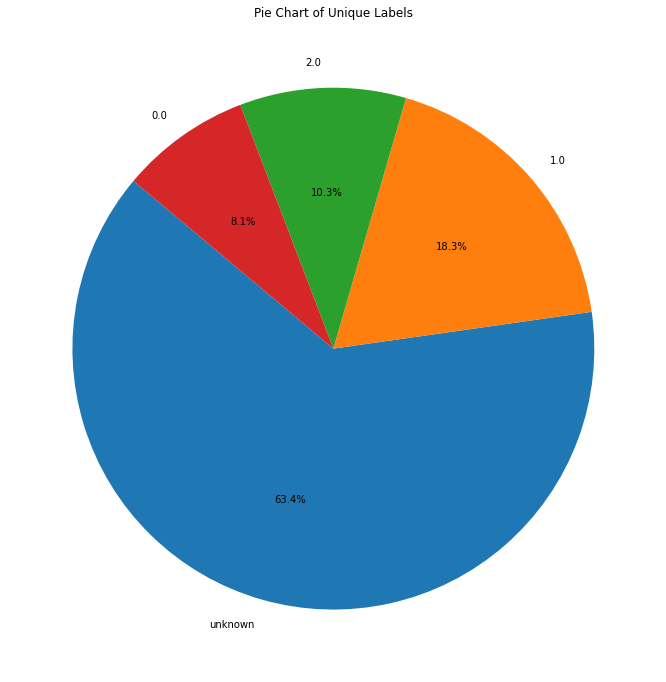

In [19]:
value_counts = df_labels['LABEL'].value_counts()
# Plot a pie chart
plt.figure(figsize=(20, 12))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Unique Labels')
plt.show()

In [20]:
set1 = set(evaluation['CARD'].tolist())
set2 = set(train['CARD'].tolist())
# Find the common elements
common_elements = set1.intersection(set2)
common_elements_list = list(common_elements)
len(common_elements_list)

0

**Dataset Overview:** <br/>
The dataset comprises 3,235 unique credit cards in the training set and 5,595 unique credit cards in the test set, bringing the total to 8,830 credit cards. Notably, these credit cards are not associated with specific dates or any other identifiable information. The objective is to develop a classification model to categorize these credit cards effectively.

# 
**Transactions**

In [21]:
transactions

,Primary_ID,TRX_Type,Date,Time,Amount,Terminal_Type,Terminal_ID,Second_ID
0,9c2594cdb4153de3f748,10,2023/06/02 00:00:00,203918290,11518977.0,7,d7b0230e4491fbd3563a,3de4bc60f38a51a82365
1,a8ae04d3b8f155a154af,10,2023/04/03 00:00:00,191720253,5000000.0,1,9a858e74cc2faefbc12c,b4980da1e29f59c92a53
2,739c869136df74852e10,10,2023/04/29 00:00:00,120418648,2000000.0,1,7cc4db9e78fb590b06a6,69c4a29dd54b44de457e
3,60366904cbdb0d067c20,10,2023/06/02 00:00:00,201139692,1000000.0,1,342abaad6ca26a8aea1e,a59ad5aa2a2b5e221572
4,911abef1ee23db40b108,10,2023/03/22 00:00:00,81928260,50000.0,7,3381cb32e729571bfdfe,8457468be95f8a197756
...,...,...,...,...,...,...,...,...
3259421,6f743892923ae636c1ac,10,2023/03/15 00:00:00,204954592,1000000.0,1,4ff68720afddc796c9fb,42057e17833b83f303f4
3259422,6f743892923ae636c1ac,10,2023/03/25 00:00:00,203016269,2000000.0,1,4ff68720afddc796c9fb,281b90d9fdcc285cca2e
3259423,6f743892923ae636c1ac,10,2023/03/30 00:00:00,121006398,1000000.0,1,4ff68720afddc796c9fb,e32ec72f1bb0e39f0ea3
3259424,6f743892923ae636c1ac,10,2023/04/10 00:00:00,213227613,1000000.0,1,4ff68720afddc796c9fb,071b8737ef9df9a13712


In [23]:
transactions = transactions.drop_duplicates()
transactions.shape

(3259426, 8)

No Duplicated Value

In [24]:
# Checkout transaction count for each of the 8830 cards.
# Note: This operation may take some time due to the large number of cards.
data = []
for card in all_cards:
    num_transaction = len(transactions[(transactions['Primary_ID'] == card) | (transactions['Second_ID'] == card)])
    data.append({'Card': card, 'num_transaction': num_transaction})
num_transaction = pd.DataFrame(data)

In [25]:
num_transaction

,Card,num_transaction
0,8e408f075b6872605906,379
1,2c8ab490002745919e9a,48
2,03fe8857991d2994fbf9,472
3,a41d87398962952dc6e2,301
4,a5a2a8417f671a395c38,961
...,...,...
8825,1b30d7dd0f8cf938d7dc,58
8826,64e272dfcf2db4b4d4af,10
8827,77787842a915e581e2b6,10
8828,c618a52c75a225593871,12


,count,mean,std,min,25%,50%,75%,max
num_transaction,8830.0,370.303624,2374.859204,1.0,33.0,90.0,271.0,151451.0


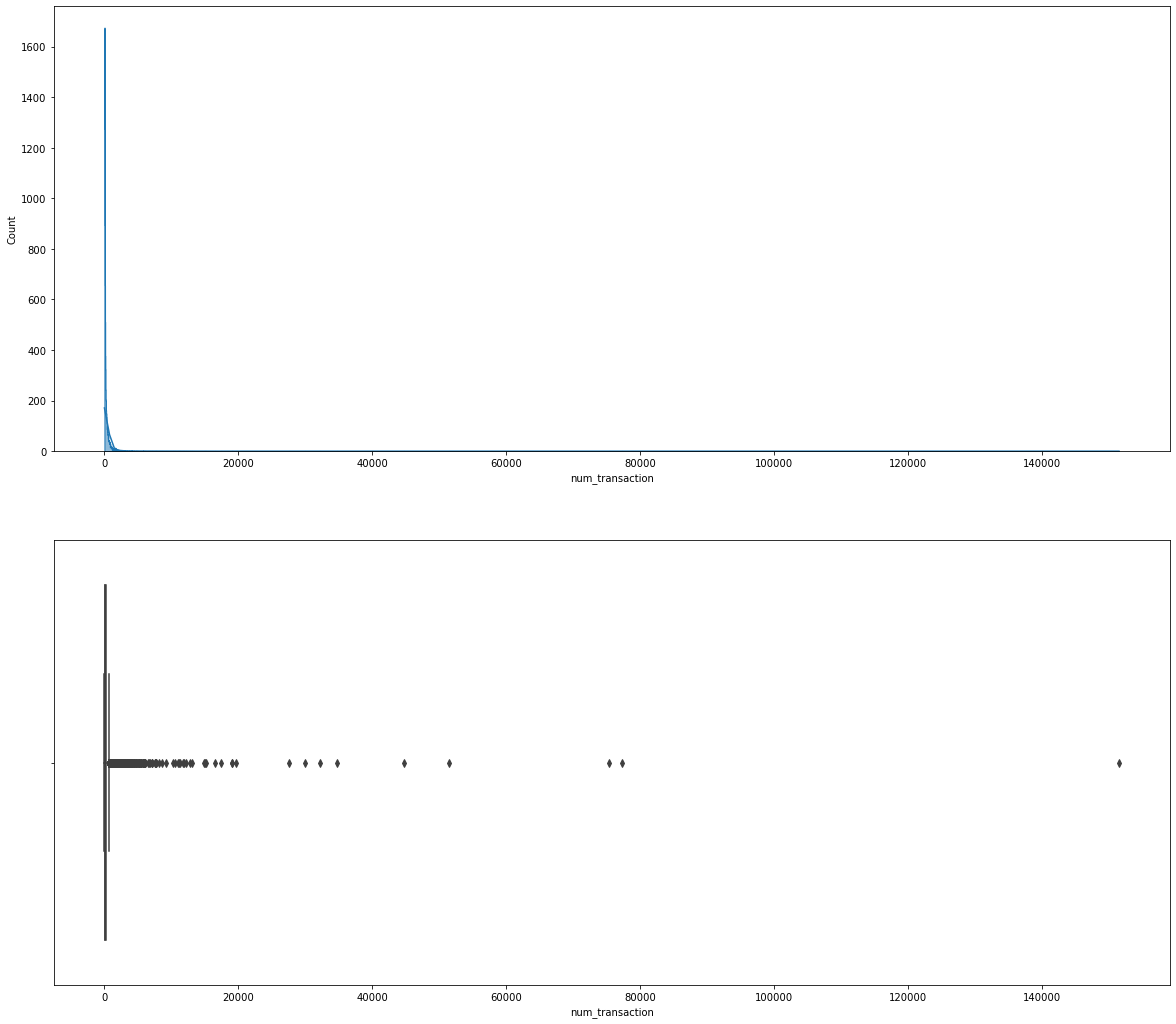

In [26]:
featureAnalysis('num_transaction',num_transaction)

In [30]:
num_transaction.to_csv('num_transaction.csv', index=False)

In [33]:
transactions.isnull().sum()

Primary_ID            0
TRX_Type              0
Date                  0
Time                  0
Amount                0
Terminal_Type         0
Terminal_ID           0
Second_ID        127382
dtype: int64

In [34]:
transactions.dropna(inplace=True)

In [36]:
data = []
for card in tqdm(all_cards, desc="Processing Cards"):
    num_transaction = len(transactions[(transactions['Primary_ID'] == card) | (transactions['Second_ID'] == card)])
    data.append({'Card': card, 'num_transaction': num_transaction})

Processing Cards: 100%|██████████████████████████████████████████████████████████| 8830/8830 [1:49:28<00:00,  1.34it/s]


In [37]:
num_transaction = pd.DataFrame(data)

,count,mean,std,min,25%,50%,75%,max
num_transaction,8830.0,355.877576,2373.031983,0.0,23.0,78.0,256.0,151451.0


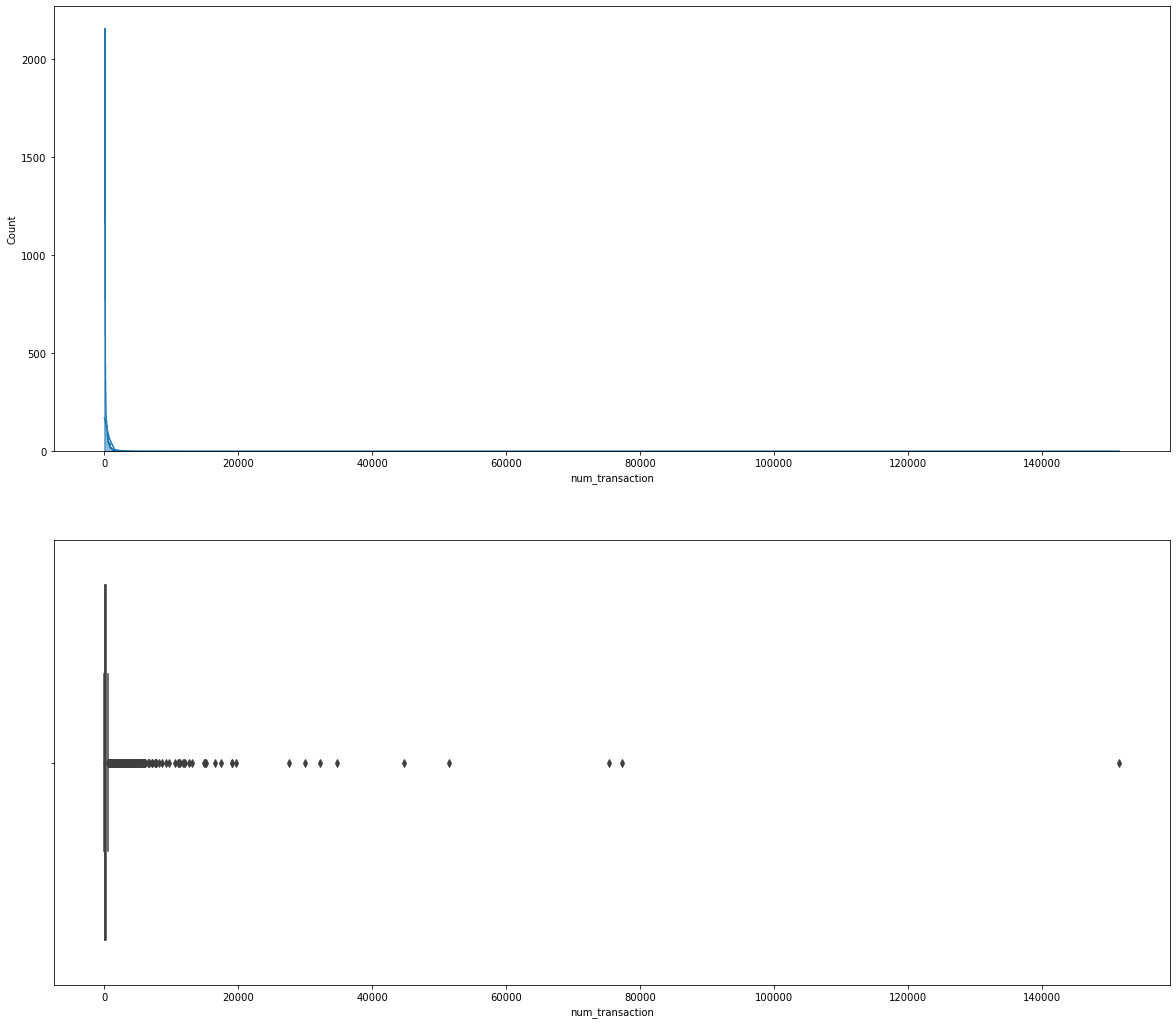

In [39]:
featureAnalysis('num_transaction' , num_transaction)

In [43]:
print("No transaction in " , len(num_transaction[num_transaction['num_transaction'] == 0]['Card'].tolist()), " Cards !")
# separately for both the training and evaluation sets.
count_train = 0
count_evaluation = 0
for card in num_transaction[num_transaction['num_transaction'] == 0]['Card'].tolist():
    if card in evaluation_cards:
        count_evaluation = count_evaluation + 1 
    elif card in train_cards:
        count_train = count_train + 1 
print(count_train , " in train dataset and " , count_evaluation , " in evaluation!")

No transaction in  128  Cards !
47  in train dataset and  81  in evaluation!


We lack data for 47 cards in the training set and 81 cards in the test set. Consequently, these records cannot be utilized for model training and evaluation.

In [44]:
print("Unique primary ID " ,transactions['Primary_ID'].nunique())
print("Unique Second ID " ,transactions['Second_ID'].nunique())

Unique primary ID  1165758
Unique Second ID  36937


In [45]:
#Evaluation and train dataset 
df_labels['LABEL'].value_counts()

unknown    5595
1.0        1612
2.0         909
0.0         714
Name: LABEL, dtype: int64

In [46]:
my_dict = dict(zip(df_labels['CARD'], df_labels['LABEL']))

In [47]:
#Use them to label transactions based on primary and second id 
transactions['labelPrimary'] = transactions['Primary_ID'].map(my_dict)
transactions['labelSecond']  = transactions['Second_ID'].map(my_dict)

In [48]:
#Checkout null values
transactions.isnull().sum()

Primary_ID             0
TRX_Type               0
Date                   0
Time                   0
Amount                 0
Terminal_Type          0
Terminal_ID            0
Second_ID              0
labelPrimary     3076150
labelSecond        45539
dtype: int64

In [49]:
print('null values of labelPrimary : ',transactions.isnull().sum()['labelPrimary'] / len(transactions))
print('null values of labelSecond  : ',transactions.isnull().sum()['labelSecond']   / len(transactions))

null values of labelPrimary :  0.9821541459826235
null values of labelSecond  :  0.014539706338735981


In [ ]:
# #Drop null value in labelSecond
# transactions.dropna(subset=['labelSecond'],inplace=True)

In [50]:
#fill null values with no info
transactions['labelSecond'] = transactions['labelSecond'].fillna('no_info')
transactions['labelPrimary'] = transactions['labelPrimary'].fillna('no_info')

In [51]:
transactions.isnull().sum()

Primary_ID       0
TRX_Type         0
Date             0
Time             0
Amount           0
Terminal_Type    0
Terminal_ID      0
Second_ID        0
labelPrimary     0
labelSecond      0
dtype: int64

# 

<a name="2"></a>
## Features
- [TRX_Type](#2.1)
- [Date](#2.2)
- [Time](#2.3)
- [Amount](#2.4)
- [Terminal_Type](#2.5)
- [Terminal_ID](#2.6)


In [52]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3132044 entries, 0 to 3259425
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Primary_ID     object 
 1   TRX_Type       int64  
 2   Date           object 
 3   Time           int64  
 4   Amount         float64
 5   Terminal_Type  int64  
 6   Terminal_ID    object 
 7   Second_ID      object 
 8   labelPrimary   object 
 9   labelSecond    object 
dtypes: float64(1), int64(3), object(6)
memory usage: 262.9+ MB


In [53]:
encodeData = transactions.copy()

<a name="2.1"></a>
- TRX_Type

In [54]:
transactions['TRX_Type'].value_counts()

10    3132044
Name: TRX_Type, dtype: int64

In [55]:
#since there's only one unique value
encodeData = transactions.drop('TRX_Type',axis=1)

<a name="2.2"></a>
- Date

In [56]:
#Convert Date to time stamp 
encodeData['timestamp'] = pd.to_datetime(encodeData['Date'])
encodeData['year']   = encodeData['timestamp'].dt.year
encodeData['month']  = encodeData['timestamp'].dt.month
encodeData['day']    = encodeData['timestamp'].dt.day
encodeData['hour']   = encodeData['timestamp'].dt.hour
encodeData['minute'] = encodeData['timestamp'].dt.minute
encodeData['second'] = encodeData['timestamp'].dt.second

In [57]:
print(encodeData['hour'].value_counts()[0]/len(encodeData))  
print(encodeData['minute'].value_counts()[0]/len(encodeData)) 
print(encodeData['second'].value_counts()[0]/len(encodeData)) 
print(encodeData['year'].value_counts()[2023]/len(encodeData))  

1.0
1.0
1.0
1.0


In [60]:
# These features cannot be extracted from this column (the time in the Date column is always 00:00:00).
# Since all transactions are in the year 2023, we can drop the year column.
encodeData.drop(['hour','minute','second','Date','year'],axis=1,inplace=True)

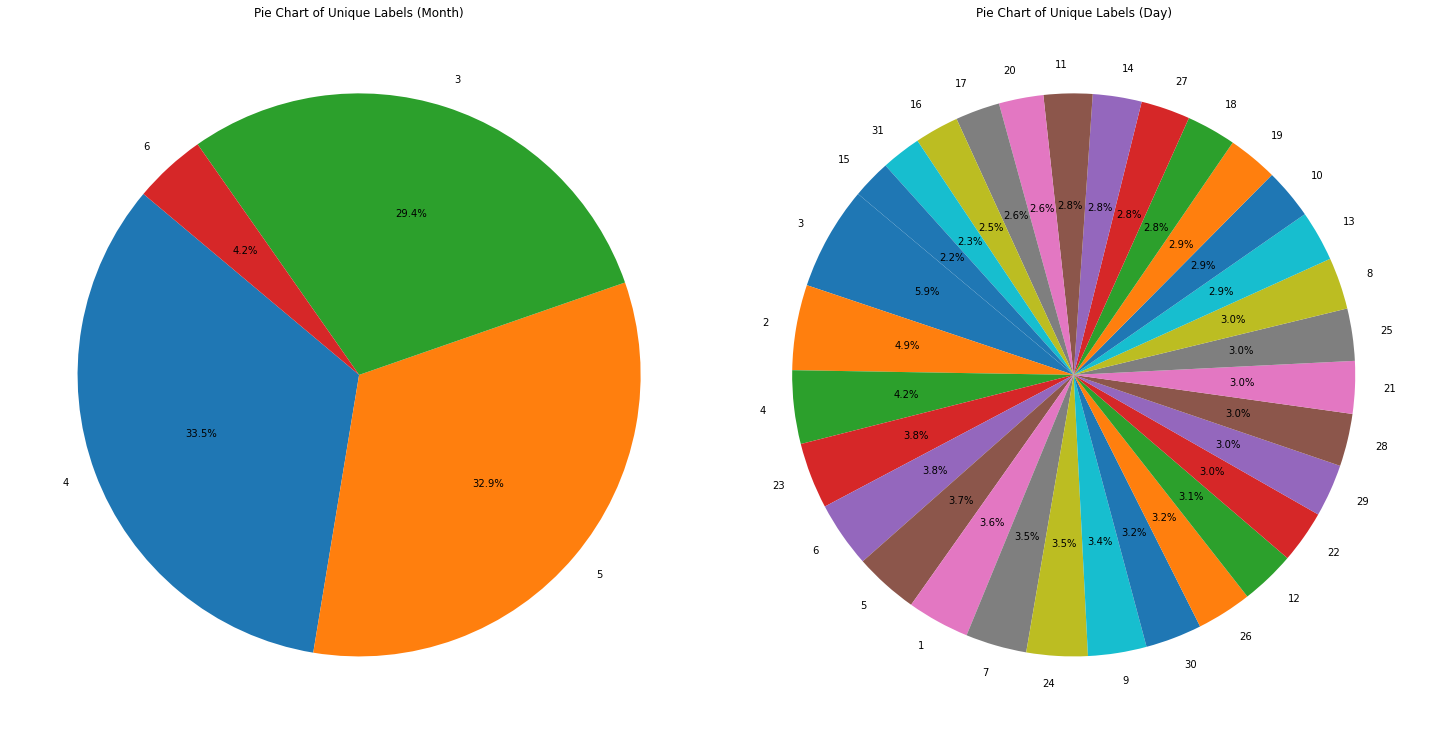

In [61]:
month_value_counts = encodeData['month'].value_counts()
day_value_counts = encodeData['day'].value_counts()
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
# Plot the pie chart for 'month'
axs[0].pie(month_value_counts, labels=month_value_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Pie Chart of Unique Labels (Month)')
# Plot the pie chart for 'day'
axs[1].pie(day_value_counts, labels=day_value_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Pie Chart of Unique Labels (Day)')
plt.tight_layout()
plt.show()

In [62]:
print('From ' , str(encodeData['timestamp'].min()), ' to ' , str(encodeData['timestamp'].max()))

From  2023-03-03 00:00:00  to  2023-06-03 00:00:00


# 

<a name="2.3"></a>
- Time

In [ ]:
featureAnalysis('Time',encodeData)

In [72]:
# Convert the 'Time' column to datetime format with millisecond precision
encodeData['Time'] = pd.to_datetime(encodeData['Time'], unit='ms')
encodeData['Hour'] = encodeData['Time'].dt.hour
encodeData['Minute'] = encodeData['Time'].dt.minute
encodeData['Second'] = encodeData['Time'].dt.second
encodeData['Microsecond'] = encodeData['Time'].dt.microsecond

In [73]:
encodeData['Hour'].value_counts()

10    185999
13    183953
0     182449
2     180473
5     179480
7     167197
8     160941
16    149945
3     147103
4     138206
23    135487
11    133677
6     130174
15    120623
9     119810
1     117614
12    111223
14    108091
21    102163
18    100263
20     90623
17     87984
22     51090
19     47476
Name: Hour, dtype: int64

In [74]:
hour_mean_amount = encodeData.groupby('Hour')['Amount'].mean().to_dict()
encodeData['hour_mean_amount'] = encodeData['Hour'].map(hour_mean_amount)

In [75]:
hour_mean_amount

{0: 7172056.625544673,
 1: 7743070.839330352,
 2: 6946985.676793759,
 3: 6455357.925202069,
 4: 7549989.855476608,
 5: 6678568.505688656,
 6: 6756510.638145866,
 7: 7298404.149721586,
 8: 6275764.800181433,
 9: 7055848.177931725,
 10: 6964539.866386378,
 11: 5876262.7644620985,
 12: 6973028.758754934,
 13: 6518307.733013324,
 14: 5862899.363573286,
 15: 6646526.486864031,
 16: 6213975.608743206,
 17: 6036591.60526914,
 18: 6691965.274667624,
 19: 6597425.584042463,
 20: 6756720.920858943,
 21: 6660163.199759209,
 22: 7573531.1495596,
 23: 7101789.400769077}

In [76]:
encodeData.drop('Time',axis=1,inplace=True)

In [77]:
bin_edges = [-1, 2, 5, 8, 11, 14, 17, 20 , 23]
bin_labels = [1, 2, 3, 4, 5, 6, 7, 8]
encodeData['hour_binned'] = pd.cut(encodeData['Hour'], bins=bin_edges, labels=bin_labels, include_lowest=True)

In [78]:
encodeData['hour_binned'].value_counts()

1    480536
2    464789
3    458312
4    439486
5    403267
6    358552
8    288740
7    238362
Name: hour_binned, dtype: int64

In [79]:
encodeData['hour_binned'] = encodeData['hour_binned'].astype(int)

In [80]:
hour_binned_mean_amount = encodeData.groupby('hour_binned')['Amount'].mean().to_dict()
encodeData['hour_binned_mean_amount'] = encodeData['hour_binned'].map(hour_binned_mean_amount)

In [81]:
hour_binned_mean_amount

{1: 7227286.694480746,
 2: 6867042.658578409,
 3: 6785380.171448708,
 4: 6658414.143729266,
 5: 6468047.46025338,
 6: 6315965.363116089,
 7: 6697754.723374532,
 8: 7029002.216353813}

In [82]:
encodeData['year'] = 2023
encodeData['combined_timestamp'] = pd.to_datetime(encodeData[['year','month', 'day', 'Hour', 'Minute', 'Second', 'Microsecond']])
encodeData.drop('timestamp',axis=1,inplace=True)

In [83]:
encodeData['day_of_week'] = encodeData['combined_timestamp'].dt.dayofweek

In [84]:
encodeData['day_of_week'].value_counts()

1    505420
2    475799
4    475074
5    469027
6    435735
3    418099
0    352890
Name: day_of_week, dtype: int64

In [85]:
day_of_week_mean_amount = encodeData.groupby('day_of_week')['Amount'].mean().to_dict()
encodeData['day_of_week_mean_amount'] = encodeData['day_of_week'].map(day_of_week_mean_amount)

In [86]:
day_of_week_mean_amount

{0: 5845285.036603474,
 1: 6935631.210242966,
 2: 6841315.159346699,
 3: 6923043.558107051,
 4: 6985867.497408825,
 5: 6923861.785713829,
 6: 6691577.917621949}

<a name="2.4"></a>
- Amount

,count,mean,std,min,25%,50%,75%,max
Amount,3132044.0,6.768677e+06,1.383031e+07,1.0,1000000.0,2000000.0,6000000.0,150000000.0


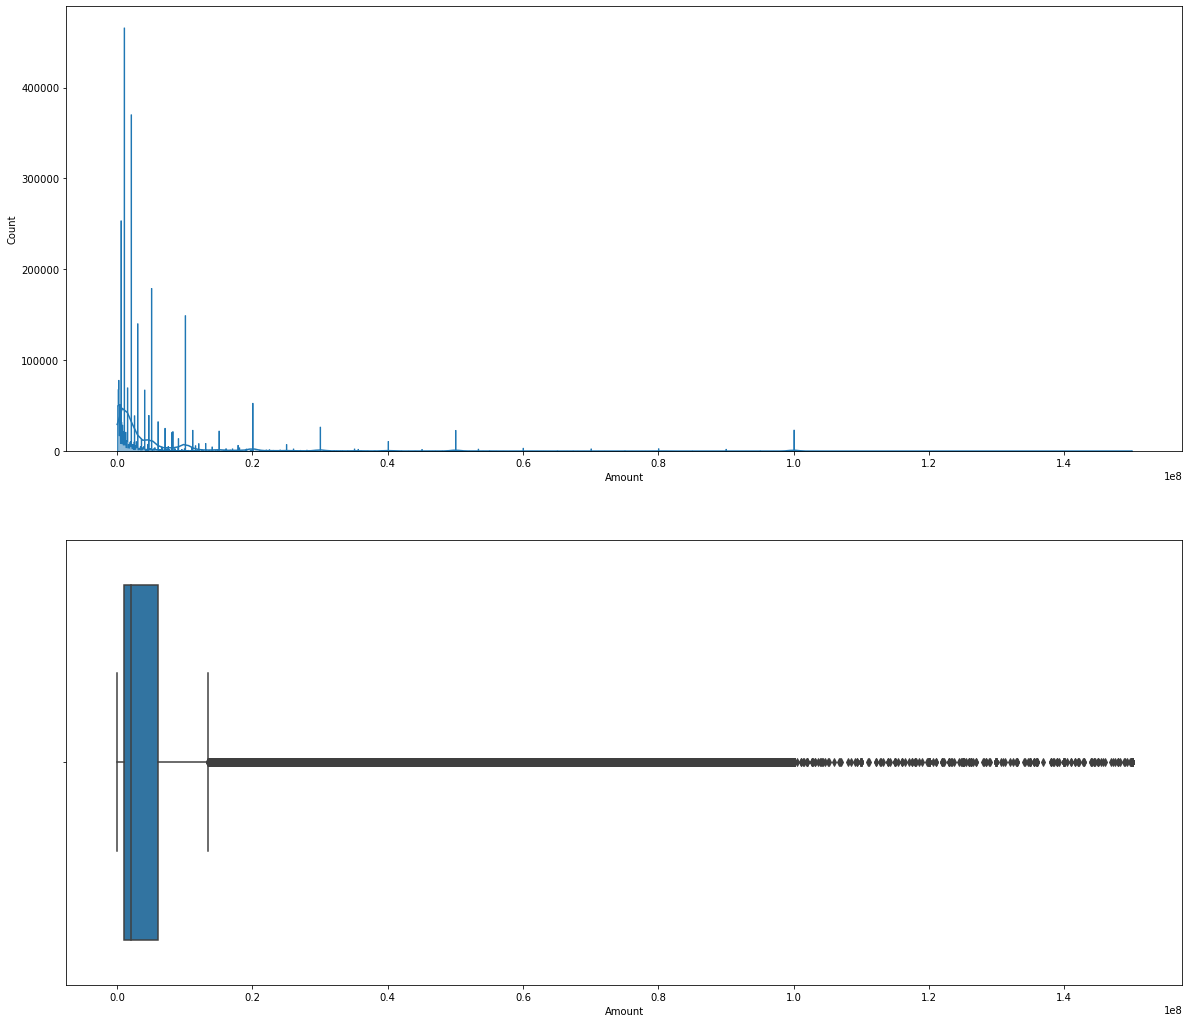

In [88]:
featureAnalysis('Amount',encodeData)

In [89]:
encodeData['log_Amount'] = np.log(encodeData['Amount'])

,count,mean,std,min,25%,50%,75%,max
log_Amount,3132044.0,14.627525,1.519028,0.0,13.815511,14.508658,15.60727,18.826146


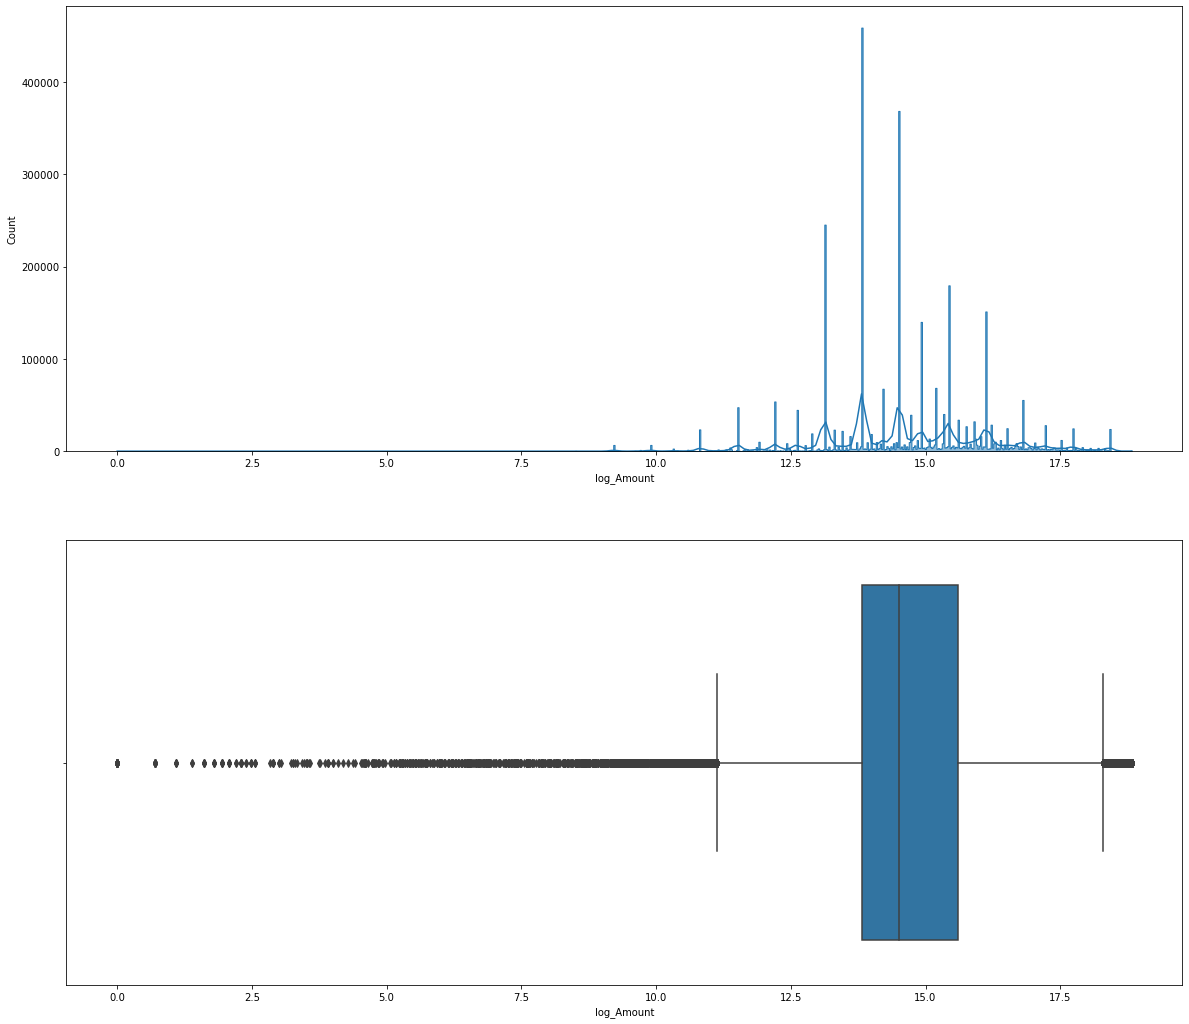

In [90]:
featureAnalysis('log_Amount',encodeData)

# 

<a name="2.5"></a>
- Terminal_Type

In [91]:
encodeData['Terminal_Type'].value_counts()

1    2249372
7     834993
6      32215
5      15464
Name: Terminal_Type, dtype: int64

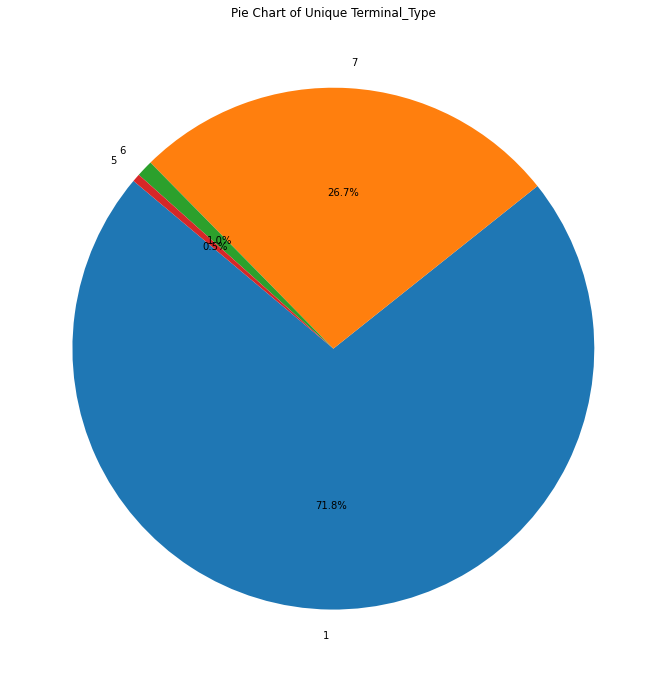

In [92]:
value_counts = encodeData['Terminal_Type'].value_counts()
# Plot a pie chart
plt.figure(figsize=(20, 12))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Unique Terminal_Type')
plt.show()

In [93]:
terminal_Type_mean_amount = encodeData.groupby('Terminal_Type')['Amount'].mean().to_dict()
encodeData['terminal_Type_mean_amount'] = encodeData['Terminal_Type'].map(terminal_Type_mean_amount)

<a name="2.6"></a> 
 - Terminal_ID

In [94]:
value_count_Terminal_ID = pd.DataFrame(encodeData['Terminal_ID'].value_counts())

,count,mean,std,min,25%,50%,75%,max
Terminal_ID,68951.0,45.4242,2299.761765,1.0,2.0,5.0,13.0,518407.0


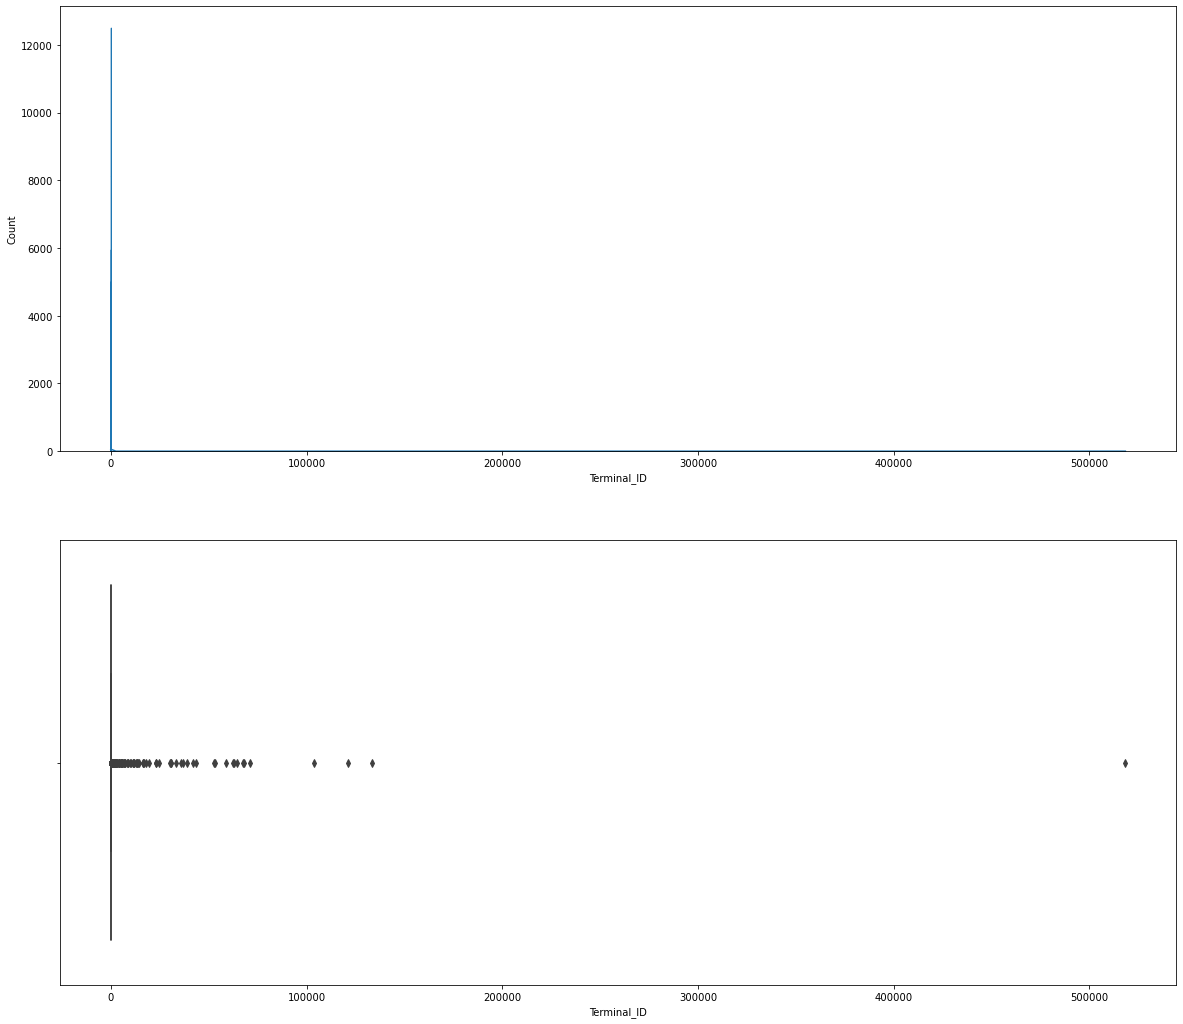

In [95]:
featureAnalysis('Terminal_ID',value_count_Terminal_ID)

In [96]:
len(value_count_Terminal_ID[value_count_Terminal_ID['Terminal_ID'] < 100]) / len(value_count_Terminal_ID)

0.9858160142710041

In [97]:
#Frequency Encoding 
terminal_id_counts = encodeData['Terminal_ID'].value_counts().to_dict()
encodeData['Terminal_ID_Count'] = encodeData['Terminal_ID'].map(terminal_id_counts)

In [98]:
terminal_id_mean_amount = encodeData.groupby('Terminal_ID')['Amount'].mean().to_dict()
encodeData['terminal_id_mean_amount'] = encodeData['Terminal_ID'].map(terminal_id_mean_amount)

- Primary ID and Second ID

In [99]:
#Frequency Encoding Primary_ID
Primary_ID_counts = encodeData['Primary_ID'].value_counts().to_dict()
encodeData['Primary_ID_counts'] = encodeData['Primary_ID'].map(Primary_ID_counts)

In [100]:
#Frequency Encoding Second_ID
Second_ID_counts = encodeData['Second_ID'].value_counts().to_dict()
encodeData['Second_ID_counts'] = encodeData['Second_ID'].map(Second_ID_counts)

**Phase Two**

In [101]:
encodeData

,Primary_ID,Amount,Terminal_Type,Terminal_ID,Second_ID,labelPrimary,labelSecond,month,day,Hour,...,year,combined_timestamp,day_of_week,day_of_week_mean_amount,log_Amount,terminal_Type_mean_amount,Terminal_ID_Count,terminal_id_mean_amount,Primary_ID_counts,Second_ID_counts
0,9c2594cdb4153de3f748,11518977.0,7,d7b0230e4491fbd3563a,3de4bc60f38a51a82365,no_info,unknown,6,2,8,...,2023,2023-06-02 08:38:38.290,4,6.985867e+06,16.259506,1.031322e+07,141,5.451315e+06,1,75392
1,a8ae04d3b8f155a154af,5000000.0,1,9a858e74cc2faefbc12c,b4980da1e29f59c92a53,no_info,0.0,4,3,5,...,2023,2023-04-03 05:15:20.253,0,5.845285e+06,15.424948,5.280032e+06,36688,5.460239e+06,1,16529
2,739c869136df74852e10,2000000.0,1,7cc4db9e78fb590b06a6,69c4a29dd54b44de457e,no_info,unknown,4,29,9,...,2023,2023-04-29 09:26:58.648,5,6.923862e+06,14.508658,5.280032e+06,67492,7.088591e+06,1,286
3,60366904cbdb0d067c20,1000000.0,1,342abaad6ca26a8aea1e,a59ad5aa2a2b5e221572,no_info,unknown,6,2,7,...,2023,2023-06-02 07:52:19.692,4,6.985867e+06,13.815511,5.280032e+06,133456,6.466540e+06,1,7174
4,911abef1ee23db40b108,50000.0,7,3381cb32e729571bfdfe,8457468be95f8a197756,no_info,unknown,3,22,22,...,2023,2023-03-22 22:45:28.260,2,6.841315e+06,10.819778,1.031322e+07,89,1.189212e+07,1,34702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259421,6f743892923ae636c1ac,1000000.0,1,4ff68720afddc796c9fb,42057e17833b83f303f4,no_info,unknown,3,15,8,...,2023,2023-03-15 08:55:54.592,2,6.841315e+06,13.815511,5.280032e+06,8877,4.401098e+06,14,789
3259422,6f743892923ae636c1ac,2000000.0,1,4ff68720afddc796c9fb,281b90d9fdcc285cca2e,no_info,unknown,3,25,8,...,2023,2023-03-25 08:23:36.269,5,6.923862e+06,14.508658,5.280032e+06,8877,4.401098e+06,14,352
3259423,6f743892923ae636c1ac,1000000.0,1,4ff68720afddc796c9fb,e32ec72f1bb0e39f0ea3,no_info,unknown,3,30,9,...,2023,2023-03-30 09:36:46.398,3,6.923044e+06,13.815511,5.280032e+06,8877,4.401098e+06,14,656
3259424,6f743892923ae636c1ac,1000000.0,1,4ff68720afddc796c9fb,071b8737ef9df9a13712,no_info,1.0,4,10,11,...,2023,2023-04-10 11:13:47.613,0,5.845285e+06,13.815511,5.280032e+06,8877,4.401098e+06,14,504


In [102]:
df_clustering = encodeData[['Amount', 'Terminal_Type', 'month', 'day', 'Hour',
       'Minute', 'Second', 'Microsecond', 'hour_binned', 'log_Amount',
       'Terminal_ID_Count', 'Primary_ID_counts', 'Second_ID_counts','terminal_id_mean_amount']]

In [103]:
df_encoded = pd.get_dummies(df_clustering, columns=['Terminal_Type'], prefix='Terminal_Type')

In [104]:
df_encoded

,Amount,month,day,Hour,Minute,Second,Microsecond,hour_binned,log_Amount,Terminal_ID_Count,Primary_ID_counts,Second_ID_counts,terminal_id_mean_amount,Terminal_Type_1,Terminal_Type_5,Terminal_Type_6,Terminal_Type_7
0,11518977.0,6,2,8,38,38,290000,3,16.259506,141,1,75392,5.451315e+06,0,0,0,1
1,5000000.0,4,3,5,15,20,253000,2,15.424948,36688,1,16529,5.460239e+06,1,0,0,0
2,2000000.0,4,29,9,26,58,648000,4,14.508658,67492,1,286,7.088591e+06,1,0,0,0
3,1000000.0,6,2,7,52,19,692000,3,13.815511,133456,1,7174,6.466540e+06,1,0,0,0
4,50000.0,3,22,22,45,28,260000,8,10.819778,89,1,34702,1.189212e+07,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259421,1000000.0,3,15,8,55,54,592000,3,13.815511,8877,14,789,4.401098e+06,1,0,0,0
3259422,2000000.0,3,25,8,23,36,269000,3,14.508658,8877,14,352,4.401098e+06,1,0,0,0
3259423,1000000.0,3,30,9,36,46,398000,4,13.815511,8877,14,656,4.401098e+06,1,0,0,0
3259424,1000000.0,4,10,11,13,47,613000,4,13.815511,8877,14,504,4.401098e+06,1,0,0,0


In [105]:
anomalyFeatures = df_encoded.columns.tolist()

In [106]:
len(anomalyFeatures)

17

In [107]:
model = IsolationForest(contamination=0.01, random_state=42)
model.fit(df_encoded[anomalyFeatures])

IsolationForest(contamination=0.01, random_state=42)

In [108]:
# Predict outliers (anomalies)
df_encoded['anomaly_score'] = model.decision_function(df_encoded[anomalyFeatures])
df_encoded['anomaly_prediction'] = model.predict(df_encoded[anomalyFeatures])

In [109]:
df_encoded['anomaly_prediction'].value_counts()

 1    3100723
-1      31321
Name: anomaly_prediction, dtype: int64

In [110]:
df_encoded.shape 

(3132044, 19)

# 

<a name="3"></a>

### Graph Based Features

In [111]:
df = encodeData.copy()

In [112]:
def count_unique_primary(encodeData_0 , baseCard):
    Primary_ID = encodeData_0['Primary_ID'].unique().tolist()
    Primary_ID = [x for x in Primary_ID if x != baseCard]
    unique_values_count = len(set(Primary_ID))
    return unique_values_count

In [113]:
def count_unique_second(encodeData_0 , baseCard):
    Second_ID = encodeData_0['Second_ID'].unique().tolist()
    Second_ID = [x for x in Second_ID if x != baseCard]
    unique_values_count = len(set(Second_ID))
    return unique_values_count

In [114]:
all_cards = df_labels['CARD'].unique().tolist()

In [115]:
len(all_cards)

8830

In [ ]:
all_feature_dicts = []
count_empty = 0
for card in tqdm(all_cards, desc="Processing cards"):
    encodeData_0 = df[(df['Primary_ID'] == card) | (df['Second_ID'] == card)]
    if len(encodeData_0) == 0:
        count_empty = count_empty + 1
    else:
        encodeData_0['basedCard'] = card
        encodeData_0['received'] = encodeData_0.apply(lambda row: 0 if row['basedCard'] == row['Primary_ID'] else (1 if row['basedCard'] == row['Second_ID'] else None), axis=1)
        feature_dict = {}
        #Card
        feature_dict['Card'] = card
        #Count transaction
        feature_dict['count_total']   = len(encodeData_0)
        feature_dict['count_received'] = encodeData_0['received'].sum()
        feature_dict['count_given']   = len(encodeData_0) - encodeData_0['received'].sum()
        
        #given and received dataset
        received = encodeData_0[encodeData_0['received'] == 0]
        given    = encodeData_0[encodeData_0['received'] == 1]
        
        #Mean Amount
        feature_dict['mean_total']    = encodeData_0['Amount'].mean()
        feature_dict['mean_given']    = given['Amount'].mean()
        feature_dict['mean_received'] = received['Amount'].mean()
        
        #STD Amount
        feature_dict['std_total']    = encodeData_0['Amount'].std()
        feature_dict['std_given']    = given['Amount'].std()
        feature_dict['std_received'] = received['Amount'].std()
        
        #Mean Minute
        feature_dict['mean_total_minute']    = encodeData_0['Minute'].mean()
        feature_dict['mean_given_minute']    = given['Minute'].mean()
        feature_dict['mean_received_minute'] = received['Minute'].mean()
        
        #Mean hour 
        feature_dict['mean_total_hour']    = encodeData_0['Hour'].mean()
        feature_dict['mean_given_hour']    = given['Hour'].mean()
        feature_dict['mean_received_hour'] = received['Hour'].mean()
        
        #Mean hour bin
        feature_dict['mean_total_hourBin']    = encodeData_0['hour_binned'].mean()
        feature_dict['mean_given_hourBin']    = given['hour_binned'].mean()
        feature_dict['mean_received_hourBin'] = received['hour_binned'].mean()
        #STD all time 
        df_sorted = encodeData_0.sort_values(by='combined_timestamp')
        time_diffs = np.diff(df_sorted['combined_timestamp'].tolist()).astype('timedelta64[us]').astype(int)
        feature_dict['std_combined'] = np.std(time_diffs)
        
        #STD hour
        feature_dict['std_total_hour']   = encodeData_0['Hour'].std()
        feature_dict['std_given_hour']   = given['Hour'].std()
        feature_dict['std_recived_hour'] = received['Hour'].std()
        #STD hour amoumt
        feature_dict['std_total_hour_amt']    = encodeData_0.groupby('Hour')['Amount'].std().mean()
        feature_dict['std_given_hour_amt']    = given.groupby('Hour')['Amount'].std().mean()
        feature_dict['std_received_hour_amt'] = received.groupby('Hour')['Amount'].std().mean()

        #Mean Day
        feature_dict['mean_total_day']   = encodeData_0['day'].mean()
        feature_dict['mean_given_day']   = given['day'].mean()
        feature_dict['mean_recived_day'] = received['day'].mean()
        
        #STD Day
        feature_dict['std_total_day']    = encodeData_0['day'].std()
        feature_dict['std_given_day']    = given['day'].std()
        feature_dict['std_received_day'] = received['day'].std()
        #STD day amoumt
        feature_dict['std_total_day_amt']    = encodeData_0.groupby('day')['Amount'].std().mean()
        feature_dict['std_given_day_amt']    = given.groupby('day')['Amount'].std().mean()
        feature_dict['std_received_day_amt'] = received.groupby('day')['Amount'].std().mean()
        
        #Mean Month
        feature_dict['mean_total_month']    = encodeData_0['month'].mean()
        feature_dict['mean_given_month']    = given['month'].mean()
        feature_dict['mean_received_month'] = received['month'].mean()
        #STD month amoumt
        feature_dict['std_total_month_amt']    = encodeData_0.groupby('month')['Amount'].std().mean()
        feature_dict['std_given_month_amt']    = given.groupby('month')['Amount'].std().mean()
        feature_dict['std_received_month_amt'] = received.groupby('month')['Amount'].std().mean()
        
        #Unique Terminal type
        feature_dict['count_total_termnialType']    = encodeData_0['Terminal_Type'].nunique()
        feature_dict['count_given_termnialType']    = given['Terminal_Type'].nunique()
        feature_dict['count_received_termnialType'] = received['Terminal_Type'].nunique()

        
        #Unique Terminal id
        feature_dict['count_total_termnialID']    = encodeData_0['Terminal_ID'].nunique()
        feature_dict['count_given_termnialID']    = given['Terminal_ID'].nunique()
        feature_dict['count_received_termnialID'] = received['Terminal_ID'].nunique()
        #Mean frequency terminal ID 
        feature_dict['mean_total_termnialID_count']    = encodeData_0['Terminal_ID_Count'].mean()
        feature_dict['mean_given_termnialID_count']    = given['Terminal_ID_Count'].mean()
        feature_dict['mean_received_termnialID_count'] = received['Terminal_ID_Count'].mean()
        
        #Count unique ID
        feature_dict['count_unique_secondID']  = count_unique_second(encodeData_0 , card)
        feature_dict['count_unique_primaryID'] = count_unique_primary(encodeData_0 , card)
        feature_dict['count_unique_ID'] = feature_dict['count_unique_secondID'] + feature_dict['count_unique_primaryID']
        #Mean frequency primary ID
        feature_dict['mean_total_Primary_ID_counts']    = encodeData_0['Primary_ID_counts'].mean()
        feature_dict['mean_given_Primary_ID_counts']    = given['Primary_ID_counts'].mean()
        feature_dict['mean_received_Primary_ID_counts'] = received['Primary_ID_counts'].mean()
        #Mean frequency second ID
        feature_dict['mean_total_Second_ID_counts_counts']    = encodeData_0['Second_ID_counts'].mean()
        feature_dict['mean_given_Second_ID_counts_counts']    = given['Second_ID_counts'].mean()
        feature_dict['mean_received_Second_ID_counts_counts'] = received['Second_ID_counts'].mean()  
        
        #Time Range
        feature_dict['min_time_day']  = encodeData_0['combined_timestamp'].min().day
        feature_dict['min_time_hour'] = encodeData_0['combined_timestamp'].min().hour
        feature_dict['max_time_day']  = encodeData_0['combined_timestamp'].max().day
        feature_dict['max_time_hour'] = encodeData_0['combined_timestamp'].max().hour
        feature_dict['std_time']      = np.std((encodeData_0['combined_timestamp'] - encodeData_0['combined_timestamp'].min()).dt.days)
        feature_dict['range_time']    = (encodeData_0['combined_timestamp'].max() - encodeData_0['combined_timestamp'].min()).days
        
        #mean each terminalType
        feature_dict['type_1'] = encodeData_0[encodeData_0['Terminal_Type'] == 1]['Amount'].mean()  
        feature_dict['type_5'] = encodeData_0[encodeData_0['Terminal_Type'] == 5]['Amount'].mean() 
        feature_dict['type_6'] = encodeData_0[encodeData_0['Terminal_Type'] == 6]['Amount'].mean()
        feature_dict['type_7'] = encodeData_0[encodeData_0['Terminal_Type'] == 7]['Amount'].mean()
        
        #mean frequency encoding
        
        #Time series features 
        # Autocorrelation Features
        encodeData_0['lag_1'] = encodeData_0['Amount'].shift(1)
        encodeData_0['lag_2'] = encodeData_0['Amount'].shift(2)
        feature_dict['autocorrelation_lag_1'] = encodeData_0['Amount'].autocorr(1)
        feature_dict['autocorrelation_lag_2'] = encodeData_0['Amount'].autocorr(2)
        
        #Number of pairs 
        encodeData_0['Pair'] = encodeData_0.apply(lambda row: tuple(sorted([row['Primary_ID'], row['Second_ID']])), axis=1)
        pair_counts = encodeData_0['Pair'].value_counts()
        pair_counts = pair_counts[pair_counts > 1]
        pair_freq_dict = pair_counts.to_dict()
        if not pair_freq_dict:
            feature_dict['Max_Pair_Frequency'] = 0
            feature_dict['Num_Pairs'] = len(encodeData_0)
        else:
            feature_dict['Max_Pair_Frequency'] = encodeData_0['Pair'].map(pair_freq_dict)
            feature_dict['Num_Pairs'] = encodeData_0['Pair'].map(pair_counts)

        #Anomaly detection total
        feature_dict['isolation_anomaly_total'] = len(encodeData_0[encodeData_0['anomaly_prediction'] == -1])
        feature_dict['isolation_normal_total']  = len(encodeData_0[encodeData_0['anomaly_prediction'] ==  1])
        feature_dict['isolation_mean_total'] = encodeData_0['anomaly_score'].mean()
        feature_dict['isolation_std_total']  = encodeData_0['anomaly_score'].std()
        #Anomaly detection given
        feature_dict['isolation_anomaly_given'] = len(given[given['anomaly_prediction'] == -1])
        feature_dict['isolation_normal_given']  = len(given[given['anomaly_prediction'] ==  1])
        feature_dict['isolation_mean_given'] = given['anomaly_score'].mean()
        feature_dict['isolation_std_given']  = given['anomaly_score'].std() 
        #Anomaly detection received
        feature_dict['isolation_anomaly_received'] = len(received[received['anomaly_prediction'] == -1])
        feature_dict['isolation_normal_received']  = len(received[received['anomaly_prediction'] ==  1])
        feature_dict['isolation_mean_received'] = received['anomaly_score'].mean()
        feature_dict['isolation_std_received']  = received['anomaly_score'].std() 
        #Label
        feature_dict['label'] = df_labels[df_labels['CARD'] == card]['LABEL'].values[0]

    all_feature_dicts.append(feature_dict)
print('8830 rows except ' , count_empty)

In [ ]:
features_df = pd.DataFrame(all_feature_dicts)

In [ ]:
features_df.drop(['Max_Pair_Frequency', 'Num_Pairs'],axis=1,inplace=True)

In [ ]:
features_df.to_csv('featuresDF_v2.csv')

In [ ]:
# features_df = pd.read_csv('featuresDF_v2.csv')

In [ ]:
features_df.info()

<a name="4"></a>
### Train the models

In [ ]:
features_df_fillZero = features_df.fillna(0)

In [ ]:
features_df_fillZero = features_df_fillZero.drop_duplicates()

In [ ]:
# features_df_fillZero.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
features_df_train = features_df_fillZero[features_df_fillZero['label'] != 'unknown']
features_df_test = features_df_fillZero[features_df_fillZero['label'] == 'unknown']

In [ ]:
X_evaluation = features_df_train.iloc[:, 1:-1]

In [ ]:
len(features_df_train) , len(features_df_test) 

In [ ]:
y.value_counts()

In [ ]:
X = features_df_train.iloc[:, 1:-1]
y = features_df_train['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

**Random Forest**

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy : ' ,accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy : ' ,accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy : ' ,accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
DF_features = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
DF_features.head(20)

In [ ]:
DF_features.tail(20)

In [ ]:
# Find the index of the tree with the highest accuracy on the training data
tree_accuracies = [accuracy_score(y_train, tree.predict(X_train)) for tree in rf.estimators_]
most_accurate_tree_index = tree_accuracies.index(max(tree_accuracies))

most_accurate_tree = rf.estimators_[most_accurate_tree_index]

# Plot the tree
plt.figure(figsize=(20, 20))
plot_tree(most_accurate_tree, filled=True, feature_names=X_train.columns, class_names=[str(i) for i in rf_weight.classes_], rounded=True)
plt.savefig('decision_tree.png', dpi=300)
plt.show()


In [ ]:
analysis_features_df_train = features_df_train.copy()
y_pred = rf.predict(X)
analysis_features_df_train['pred'] = y_pred
analysis_features_df_train

In [ ]:
false = analysis_features_df_train[analysis_features_df_train['label'] != analysis_features_df_train['pred']]

In [ ]:
false_0 = false[false['label'] == 0 ]
false_1 = false[false['label'] == 1 ]
false_2 = false[false['label'] == 2 ]

In [ ]:
false_1

In [ ]:
false_1.loc[5624]

In [ ]:
false_2.columns

In [ ]:
y_test.value_counts() / len(y_test)

In [ ]:
class_weights = {0: 0.205329, 1: 0.537618, 2:0.257053}
rf_weight = RandomForestClassifier(n_estimators=500, random_state=42, class_weight=class_weights)
rf_weight.fit(X_train, y_train)
y_pred = rf_weight.predict(X_test)
y_prob = rf_weight.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy : ' ,accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
0.9404

In [ ]:
clf = XGBClassifier(n_estimators=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy:', accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
.935

In [ ]:
clf = GradientBoostingClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy:', accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
clf = ExtraTreesClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy:', accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
clf = AdaBoostClassifier(n_estimators=500, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy:', accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(1000,), max_iter=500, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average=None)
print('accuracy:', accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Perform PCA
n_components = 45  
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the MLP model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=3, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Predictions
y_pred_probs = model.predict(X_test_scaled)
y_pred = tf.argmax(y_pred_probs, axis=1)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
print('accuracy:', accuracy)
print('f1:', f1)
print("Classification Report:\n", classification_rep)

In [ ]:


#Define the MLP model
model = Sequential()
model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
model.add(BatchNormalization())
model.add(Dense(units=64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(units=3, activation='softmax'))


# Compile the model
model.compile(optimizer=Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
# Predictions
y_pred_probs = model.predict(X_test)
y_pred = tf.argmax(y_pred_probs, axis=1)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
classification_rep = classification_report(y_test, y_pred)
print('accuracy:', accuracy)
print('f1:', f1)
print("Classification Report:\n", classification_rep)